In [3]:
################
# Basic imports
################
import os
import pandas as pd
from pathlib import Path
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

root_dir = Path(".").parent.absolute().parent
data_dir = os.path.join(root_dir, 'data')
nltk_dir = os.path.join(data_dir, 'nltk')
Path(nltk_dir).mkdir(parents=True, exist_ok=True)
nltk.download('wordnet', download_dir=nltk_dir)
nltk.data.path.append(nltk_dir)

[nltk_data] Downloading package wordnet to
[nltk_data]     D:\workspace\repo\TopLemmas\data\nltk...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
lemmatizer = WordNetLemmatizer()

In [11]:
# Reading in Nation's dataset
pnation = pd.read_csv(os.path.join(data_dir, 'pnation_1000headwords.txt'),
                    names=["word"], encoding='windows-1252')

# Reading in Norvig's dataset
pnorvig = pd.read_csv(os.path.join(data_dir, 'pnorvig_count_1w.txt'),
                    names=["word","count"], delimiter="\t")

In [20]:
###########
# lemmatize Norvig's dataset using wordnet
###########
# Sidenote: in his dataset, there is an entry value "Nan" which, if read into a dataframe translate to the actual Nan value.
# To circumvent this, the values have been encapsulated as string
pnorvig['lemma_nltk'] = pnorvig.apply(lambda x: lemmatizer.lemmatize(f"{x[0]}"), axis=1)
print(len(pnorvig)) # 333333

333333


In [22]:
# Grouping same lemmas and summing up their count
pnorvig.sort_values(by='lemma_nltk', inplace=True)
grouped_lemma = pnorvig.groupby('lemma_nltk')['count'].sum().reset_index()
grouped_lemma.sort_values(by='count', inplace=True, ascending=False)
print(len(grouped_lemma)) # 315338

315338


In [75]:
grouped_lemma = grouped_lemma[:]
result_dict = {}
pnation_lower = pnation['word'].str.lower()
len_pnation = len(pnation_lower)

for i in range(10000, 100000, 10000):
# for equal spaces:
# steps = 50
# for i in np.linspace(0, len(grouped_lemma), steps, dtype=int):
    if i == 0:
        continue
    contained = grouped_lemma[:i][grouped_lemma[:i]['lemma_nltk'].isin(pnation_lower)]
    not_contained = grouped_lemma[:i][~grouped_lemma[:i]['lemma_nltk'].isin(pnation_lower)]
    percentage_contained = len(contained)/len_pnation
    result_dict[i] = {'contained':contained,
               'not_contained':not_contained,
               'percentage_contained': f"{percentage_contained:.2f}"}

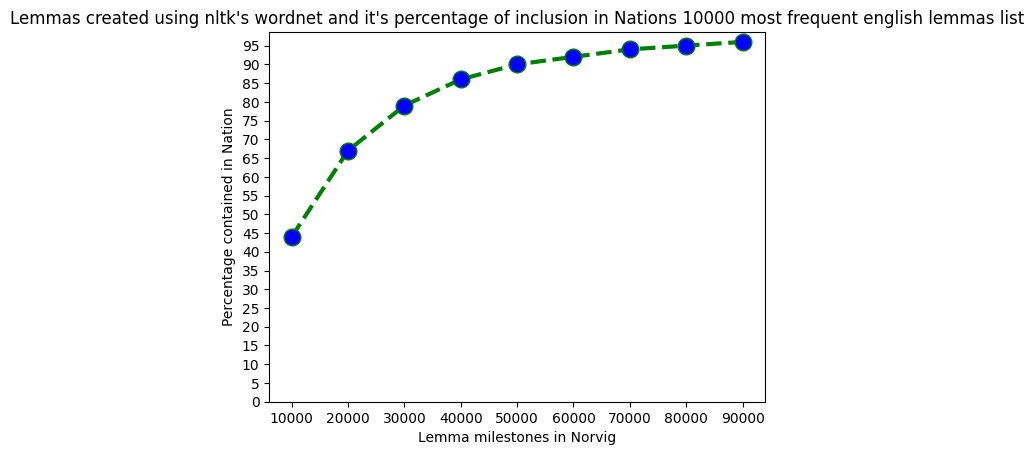

In [96]:
###########
# Plotting the result
###########

x = []
y = []
for key in result_dict:
    x.append(key)
    y.append(float(result_dict[key]['percentage_contained'])*100)
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylim(ymin=0)
plt.yticks(np.arange(0, 100, 5.0))
plt.xlabel('Lemma milestones in Norvig')
plt.ylabel('Percentage contained in Nation')

plt.title("Lemmas created using nltk's wordnet and it's percentage of inclusion in Nations 10000 most frequent english lemmas list")
# function to show the plot
plt.show()

In [107]:
print(f"Using the nltk wordnet library and calculating lemmas for the top 10000 \n"
      f"most frequent words provided by Norvig's dataset, covers {float(result_dict[10000]['percentage_contained'])*100}% \n"
      f"of Nation's lemma list ")

Using the nltk wordnet library and calculating lemmas for the top 10000 
most frequent words provided by Norvig's dataset, covers 44.0% 
of Nation's lemma list 


In [108]:
pnorvig[pnorvig['lemma_nltk'] =='wa']

word       count lemma_nltk
2306     wa    34865016         wa
29      was  1483428678         wa
99808  wass       99467         wa

In [32]:
lemmatizer.lemmatize('was')

'wa'

In [117]:
##########
# Export
##########
pnorvig.sort_values(by='count', inplace=True, ascending=False)
pnorvig.to_csv(os.path.join(root_dir,'nltk_lemma','pnorvig_count_1w_lemma_wordnet.txt'), index=None)

In [5]:

lemmatizer.lemmatize('best')

'best'